In [9]:
pip install fastDamerauLevenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fastDamerauLevenshtein: filename=fastDamerauLevenshtein-1.0.7-cp37-cp37m-linux_x86_64.whl size=59371 sha256=0b2443e8472d23db4f2d808c97d1c39e7b24d1c3303723f0b778fd34a59b463d
  Stored in directory: /root/.cache/pip/wheels/3d/f6/ac/23a63dea60e40b449efa973a54f5b1ba766a984be2d7b95964
Successfully built fastDamerauLevenshtein


In [27]:
import numpy as np
import math
import time
import sys
from fastDamerauLevenshtein import damerauLevenshtein
import random

In [ ]:
distance=np.zeros((26,26))

(26, 26)

In [30]:

alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

l1=input length, l2=pattern length

d is the array used in main.cpp
 edit_distance(input, pattern, length_input, length_pattern, dist_array, &elapsed_time);

In [58]:
rt_seq=[]
d_seq=[]
rt_sim=[]
d_sim=[]
rt_diag_sim=[]
d_diag_sim=[]
rt_dp_sim=[]
d_dp_sim=[]
rt_kb=[]
d_kb=[]
rt_diag_kb=[]
d_diag_kb=[]
rt_dp_kb=[]
d_dp_kb=[]
rt_dame_leve=[]
d_dame_leve=[]
#rt_jaro=[]
d_jaro=[]
rt_jw=[]
d_jw=[]

#Lavenshtein distance

#edit distance

In [48]:
def edit_distance(ip, pat, li, lp, d):
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0]=i
  for i in range(0,lp+1):
    d[0][i]=i

  for i in range(1,li+1):
    for j in range(1,lp+1):
      if(ip[i-1] == pat[j-1]):
        d[i][j] = d[i-1][j-1]
      else:
        d[i][j]=min(d[i][j-1],d[i-1][j],d[i-1][j-1])+1
        
  end=time.process_time()
  run_time=end-start
  d_seq.append(d[li][lp])
  rt_seq.append(run_time)
  

#edit distance diag

In [28]:
def edit_distance_diag(ip, pat, li, lp, d):
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0]=i
  for i in range(0,lp+1):
    d[0][i]=i
  #upper left
  for i in range(1,lp+1):
    max=np.NaN
    if (i <= li):
      max = i + 1;
    else:
      max = li + 1;
    for j in range(1,max):
      if ip[j-1]==pat[i-j]:

      '''
      min = d[j-1][i-j] + 0 if(ip[j-1] == pat[i-j]) else 1
      if(min > d[j-1][i-j+1]+1):
        min = d[j-1][i-j+1]+1;
      if(min > d[j][i-j]+1):
        min = d[j][i-j]+1;
      d[j][i-j+1] = min;
      '''
  #upper right
  for i in range(1,li):
    diag_max=np.NaN
    if ((li > lp) and(i <= li - lp)): 
      diag_max = lp; 
    else:
      diag_max = li - i
    for j in range(1,diag_max+1):
      min = d[j+i-1][lp-j] + 0 if(ip[j+i-1] == pat[lp-j]) else 1
      if(min > d[i+j-1][lp-j+1]+1):
        min = d[i+j-1][lp-j+1]+1
      if(min > d[i+j][lp-j]+1):
        min = d[i+j][lp-j]+1;
      d[i+j][lp-j+1] = min;
  end=time.process_time()
  run_time=end-start
  print("Levenshtein Distance with Diagonal skipping={}".format(d[li][lp]))
  print("run time={}".format(run_time))

#edit distance diag pruning

In [23]:
def edit_distance_diag_prun(ip, pat, li, lp,k, d):
  pruning_bits=np.zeros(30,dtype='int')
  p_traversal=0
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = i
  for i in range(0,lp+1):
    d[0][i]=i
    pruning_bits[i]=0

  pruning_bits[0] = 1
  #upper left

  for i in range(1,lp+1):
    max=np.NaN
    if (i <= li):
      max = i + 1
    else:
      max = li + 1
    for j in range(1,max):
      if (pruning_bits[i-j+1] == 1):
        break 
      #deletion for being equal to pattern
      min = d[j-1][i-j+1]+ 1
      if (pruning_bits[i-j] == 0):        
        sub = d[j-1][i-j] + 0 if ip[j-1]==pat[i-j] else 1
        if(min > sub):
          min = sub
        #insertion for being equal to pattern
        if(min > d[j][i-j] + 1):
          min = d[j][i-j] + 1
        d[j][i-j+1] = min
      else:
        #for the leftmost column
        if (i-j+1== 1):
          #substitution: i-th input and j-th pattern character, string array starts from index 0 
          sub = d[j-1][0] + 0 if ip[j-1]==pat[0] else 1
          if(min > sub):
            min = sub
          #insertion for being equal to pattern
          if(min > d[j][0] + 1):
            min = d[j][0] + 1
          if ((min > k) and (d[j][0] > k)):
            p_traversal = i;
            pruning_bits[i-j+1] = 1;
          else:
            d[j][i-j+1] = min;
            break
        else:
          if p_traversal==i-1:
            sub = d[j-1][i-j] + 0 if ip[j-1]==pat[i-j] else 1
            if(min > sub):
              min = sub
          if (min > k):
            p_traversal = i
            pruning_bits[i-j+1]=1
          else:
            d[j][i-j+1] = min
        break
  #from upper right
  for i in range(1,li):
    diag_max=np.NaN
    if ((li > lp) and (i <= li - lp)): 
      diag_max = lp 
    else:
      diag_max = li - i
    for j in range(1,diag_max+1):
      if (pruning_bits[lp-j+1] == 1):
        break
      #deletion for being equal to pattern
      min = d[j+i-1][lp-j+1] + 1
      if (pruning_bits[lp-j] == 0):
        #substitution 
        sub = d[i+j-1][lp-j] + 0 if ip[i+j-1]==pat[lp-j] else 1
        if(min > sub):
          min = sub
        #insertion for being equal to pattern
        if(min > d[i+j][lp-j] + 1):
          min = d[i+j][lp-j] + 1
        d[i+j][lp-j+1] = min
      else:
        if (p_traversal == i-1 + lp):   
          #substitution 
          sub = d[i+j-1][lp-j] + 0 if ip[i+j-1]==pat[lp-j] else 1
          if(min > sub):
            min = sub
        if (min > k):
          p_traversal = i+lp;
          pruning_bits[lp-j+1] = 1
        else:
          d[i+j][lp-j+1] = min
        break
  end=time.process_time()
  run_time=end-start
  print("Levenshtein Distance with diagonal pruning={}".format(d[li][lp]))
  print("run time={}".format(run_time))
        

#character shape Similarity metric




In [34]:
const_sub=1.87
simil_array=np.array([[0.00,2.13,2.50,2.57,3.40,1.06,3.30,1.57,1.16,1.13,1.13,1.10,1.40,1.63,3.13,2.03,2.60,1.43,2.13,1.07,2.40,1.23,1.13,1.10,1.07,1.37],[2.13,0.00,3.03,5.60,2.27,1.83,3.53,3.70,1.43,1.43,2.13,2.77,1.23,1.77,4.20,5.07,4.67,1.27,1.40,1.63,1.93,1.40,1.10,1.07,1.20,1.13],
                      [2.50,3.03,0.00,3.57,4.43,1.24,2.47,1.30,1.10,1.13,1.30,1.17,1.20,2.00,5.23,2.60,2.77,1.40,2.43,1.40,2.17,1.53,1.23,1.23,1.29,1.47],[2.57,5.60,3.57,0.00,2.87,1.43,4.10,2.73,1.73,1.27,1.33,2.30,1.13,1.93,4.90,5.10,5.10,1.33,1.27,1.37,1.83,1.55,1.07,1.23,1.13,1.23],
                      [3.40,2.27,4.43,2.87,0.00,1.33,2.37,1.23,1.20,1.17,1.20,1.07,1.13,1.73,4.13,2.40,2.43,1.27,2.20,1.20,1.57,1.23,1.30,1.30,1.37,1.33],[1.06,1.83,1.24,1.43,1.33,0.00,1.40,1.80,4.16,3.67,1.57,4.03,1.33,1.20,1.17,1.63,1.47,3.80,1.27,4.80,1.27,1.23,1.13,1.28,1.40,1.30],
                      [3.30,3.53,2.47,4.10,2.37,1.40,0.00,1.57,1.53,2.33,1.17,1.30,1.27,1.70,3.47,4.50,5.30,1.27,1.80,1.13,1.73,1.20,1.17,1.20,2.67,1.23],[1.57,3.70,1.30,2.73,1.23,1.80,1.57,0.00,1.93,1.60,2.77,2.53,2.53,5.53,1.47,2.47,2.17,2.37,1.23,1.97,3.33,1.40,1.30,1.23,1.50,1.20],
                      [1.16,1.43,1.10,1.73,1.20,4.16,1.53,1.93,0.00,5.17,1.90,6.13,1.63,1.50,1.33,1.60,1.55,2.70,1.07,3.90,1.67,1.67,1.30,1.40,1.50,1.13],[1.13,1.43,1.13,1.27,1.17,3.67,2.33,1.60,5.17,0.00,1.47,4.67,1.13,1.30,1.00,1.57,1.63,2.30,1.17,3.80,1.30,1.37,1.10,1.26,2.87,1.23],
                      [1.13,2.13,1.30,1.33,1.20,1.57,1.17,2.77,1.90,1.47,0.00,2.80,1.20,1.53,1.03,1.53,1.47,2.00,1.40,2.13,1.26,1.97,2.07,3.55,2.03,1.50],[1.10,2.77,1.17,2.30,1.07,4.03,1.30,2.53,6.13,4.67,2.80,0.00,1.07,1.37,1.23,1.80,1.83,3.26,1.10,4.50,1.29,1.37,1.33,1.27,1.81,1.10],
                      [1.40,1.23,1.20,1.13,1.13,1.33,1.27,2.53,1.63,1.13,1.20,1.07,0.00,4.67,1.30,1.33,1.17,2.23,1.20,1.07,2.27,1.33,3.40,1.10,1.20,1.10],[1.63,1.77,2.00,1.93,1.73,1.20,1.70,5.53,1.50,1.30,1.53,1.37,4.67,0.00,2.40,1.83,1.90,3.13,1.52,1.10,4.53,1.97,1.61,1.03,1.43,1.57],
                      [3.13,4.20,5.23,4.90,4.13,1.17,3.47,1.47,1.33,1.00,1.03,1.23,1.30,2.40,0.00,3.60,4.10,1.13,2.27,1.13,2.83,1.27,1.13,1.07,1.17,1.27],[2.03,5.07,2.60,5.10,2.40,1.63,4.50,2.47,1.60,1.57,1.53,1.80,1.33,1.83,3.60,0.00,5.57,1.77,1.26,1.33,1.80,1.13,1.17,1.10,1.97,1.17],
                      [2.60,4.67,2.77,5.10,2.43,1.47,5.30,2.17,1.55,1.63,1.47,1.83,1.17,1.90,4.10,5.57,0.00,1.47,1.23,1.80,2.30,1.20,1.03,1.10,2.03,1.17],[1.43,1.27,1.40,1.33,1.27,3.80,1.27,2.37,2.70,2.30,2.00,3.26,2.23,3.13,1.13,1.77,1.47,0.00,1.60,3.37,1.97,1.67,1.03,1.43,1.27,1.30],
                      [2.13,1.40,2.43,1.27,2.20,1.27,1.80,1.23,1.07,1.17,1.40,1.10,1.20,1.52,2.27,1.26,1.23,1.60,0.00,1.20,1.33,1.13,1.10,1.63,1.33,2.17],[1.07,1.63,1.40,1.37,1.20,4.80,1.13,1.97,3.90,3.80,2.13,4.50,1.07,1.10,1.13,1.33,1.80,3.37,1.20,0.00,1.60,1.40,1.00,1.47,1.50,1.27],
                      [2.40,1.93,2.17,1.83,1.57,1.27,1.73,3.33,1.67,1.30,1.26,1.29,2.27,4.53,2.83,1.80,2.30,1.97,1.33,1.60,0.00,4.93,2.73,1.40,3.13,1.57],[1.23,1.40,1.53,1.55,1.23,1.23,1.20,1.40,1.67,1.37,1.97,1.37,1.33,1.97,1.27,1.13,1.20,1.67,1.13,1.40,4.93,0.00,5.03,2.63,5.33,1.97],
                      [1.13,1.10,1.23,1.07,1.30,1.13,1.17,1.30,1.30,1.10,2.07,1.33,3.40,1.61,1.13,1.17,1.03,1.03,1.10,1.00,2.73,5.03,0.00,2.23,2.43,1.67],[1.10,1.07,1.23,1.23,1.30,1.28,1.20,1.23,1.40,1.26,3.55,1.27,1.10,1.03,1.07,1.10,1.10,1.43,1.63,1.47,1.40,2.63,2.23,0.00,3.10,1.80],
                      [1.07,1.20,1.29,1.13,1.37,1.40,2.67,1.50,1.50,2.87,2.03,1.81,1.20,1.43,1.17,1.97,2.03,1.27,1.33,1.50,3.13,5.33,2.43,3.10,0.00,1.93],[1.37,1.13,1.47,1.23,1.33,1.30,1.23,1.20,1.13,1.23,1.50,1.10,1.10,1.57,1.27,1.17,1.17,1.30,2.17,1.27,1.57,1.97,1.67,1.80,1.93,0.00]])
avg_length=5.1

In [49]:
def edit_distance_sim(ip,pat,li,lp,d,cost):
  
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = cost * i

  for i in range(0,lp+1):
    d[0][i] = cost * i
  
  for i in range(1,li+1):
    for j in range(1,lp+1):
      #substition
      min = d[i-1][j-1]+ 0 if ip[i-1]==pat[j-1] else 1/simil_array[ord(ip[i-1])-97][ord(pat[j-1])-97]*const_sub

      #deletion
      if(min > d[i-1][j] + cost):
        min = d[i-1][j] + cost
          
      #insertion
      if(min > d[i][j-1] + cost):
        min = d[i][j-1] + cost

      d[i][j] = min

 
  end=time.process_time()
  run_time=end-start
  d_sim.append(d[li][lp])
  rt_sim.append(run_time)
   

In [62]:
def edit_distance_diag_sim(ip,pat,li,lp,d,cost):
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = cost * i

  for i in range(0,lp+1):
    d[0][i] = cost * i

  #from upper left
  for i in range(1,lp+1):

    max=np.NaN
    if (i <= li):
      max = i + 1
    else:
      max = li + 1;

    for j in range(1,max):
    
      #substition
      min = d[j-1][i-j]+ 0 if (ip[j-1] == pat[i-j]) else 1/simil_array[ord(ip[j-1])-97][ord(pat[i-j])-97]*const_sub

      #deletion
      if(min > d[j-1][i-j+1] + cost): 
        min = d[j-1][i-j+1] + cost
          
      #insertion
      if(min > d[j][i-j] + cost):
        min = d[j][i-j] + cost

      d[j][i-j+1] = min
  
  #from upper right
  for i in range(1,li):
    diag_max=np.NaN
    if ((li > lp) and (i <= li - lp)): 
        diag_max = lp; 
    else:
      diag_max = li - i
      
    for j in range(1,diag_max+1):
      
      #substitution
      min = d[i+j-1][lp-j]+ 0 if ip[i+j-1] == pat[lp-j] else 1/simil_array[ord(ip[i+j-1])-97][ord(pat[lp-j])-97]*const_sub

      #deletion
      if(min > d[i+j-1][lp-j+1] + cost):
        min = d[i+j-1][lp-j+1] + cost

      #insertion
      if(min > d[i+j][lp-j] + cost):
        min = d[i+j][lp-j] + cost
      d[i+j][lp-j+1] = min
  end=time.process_time()
  run_time=end-start
  d_diag_sim.append(d[li][lp])
  rt_diag_sim.append(run_time)
  

In [64]:
def edit_distance_diag_prun_sim(ip,pat,li,lp,d,k,cost):
  pruning_bits=np.zeros(30,dtype='int')
  p_traversal=0
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = cost * i
  for i in range(0,lp+1):
  
    d[0][i] = cost * i
    pruning_bits[i] = 0
  
  pruning_bits[0] = 1
  #from upper left
  for i in range(1,lp+1):
  
    max=np.NaN
    if (i <= li):
      max = i + 1;
    else:
      max = li + 1

    for j in range(1,max):
    
      if (pruning_bits[i-j+1] != 0):
        break 

      #deletion for being equal to pattern
      min = d[j-1][i-j+1]+ cost

      if (pruning_bits[i-j] == 0):
      
        #substitution: i-th input and j-th pattern character, string array starts from index 0 
        sub = d[j-1][i-j]+ 0 if (ip[j-1] == pat[i-j]) else 1/simil_array[ord(ip[j-1])-97][ord(pat[i-j])-97]*const_sub

        if(min > sub):
          min = sub

        #insertion for being equal to pattern
        if(min > d[j][i-j] + cost):
          min = d[j][i-j] + cost

        d[j][i-j+1] = min
      
      else:
      
        #for the leftmost column
        if (i-j+1== 1):
        
          #substitution: i-th input and j-th pattern character, string array starts from index 0 
          sub = d[j-1][0]+ 0 if ip[j-1] == pat[0] else 1/simil_array[ord(ip[j-1])-97][ord(pat[0])-97]*const_sub

          if(min > sub):
            min = sub

          #insertion for being equal to pattern
          if(min > d[j][0] + cost):
            min = d[j][0] + cost

          if ((min > k)and (d[j][0] > k)):
          
            p_traversal = i;
            pruning_bits[i-j+1]=1
          
          else:
            d[j][i-j+1] = min

        
        else:
          if (p_traversal == i-1):
            #substitution: i-th input and j-th pattern character, string array starts from index 0 
            sub = d[j-1][i-j]+ 0 if ip[j-1] == pat[i-j] else 1/simil_array[ord(ip[j-1])-97][ord(pat[i-j])-97]*const_sub
            if(min > sub):
              min = sub
          #no need to calculate distance of insertion
          if (min > k) :
            p_traversal = i
            pruning_bits[i-j+1]=1
          else:
            d[j][i-j+1] = min
        break

  #from upper right
  for i in range(1,li):
    diag_max=np.NaN;
    if ((li > lp) and (i <= li - lp)): 
      diag_max = lp 
    else:
      diag_max = li - i
    for j in range(1,diag_max+1):
      if (pruning_bits[lp-j+1] == 1):
        break
      #deletion for being equal to pattern
      min = d[j+i-1][lp-j+1] + cost
      if (pruning_bits[lp-j] == 0):
        #substitution 
        sub = d[i+j-1][lp-j] + 0 if ip[i+j-1]==pat[lp-j] else 1/simil_array[ord(ip[i+j-1])-97][ord(pat[lp-j])-97]*const_sub
        if(min > sub):
          min = sub
        #insertion for being equal to pattern
        if(min > d[i+j][lp-j] + cost):
          min = d[i+j][lp-j] + cost
        d[i+j][lp-j+1] = min
      else:
        if (p_traversal == i-1 + lp):   
          #substitution 
          sub = d[i+j-1][lp-j] + 0 if ip[i+j-1]==pat[lp-j] else 1/simil_array[ord(ip[i+j-1])-97][ord(pat[lp-j])-97]*const_sub
          if(min > sub):
            min = sub
        if (min > k):
          p_traversal = i+lp;
          pruning_bits[lp-j+1] = 1
        else:
          d[i+j][lp-j+1] = min
        break

  end=time.process_time()
  run_time=end-start
  d_dp_sim.append(d[li][lp])
  rt_dp_sim.append(run_time)
  
  

#keyboard distance

In [38]:
const_keyboard=0.1084
keyboard=[['`','1','2','3','4','5','6','7','8','9','0','-','=' ],
    ['q','w','e','r','t','y','u','i','o','p','[',']','\\'],
    ['a','s','d','f','g','h','j','k','l',';',124, 0,  0],
    ['z','x','c','v','b','n','m',',','.','/', 0,  0,  0],
    [0,    0,' ',' ',' ',' ',' ',  0,  0,  0, 0,  0,  0]]
shifted_keyboard=[['~', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '+',  0 ],
    ['Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', '{', '}', '|'],
    ['A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L', ':', '"',   0,  0],
    ['Z', 'X', 'C', 'V', 'B', 'N', 'M', '<', '>', '?',   0,   0,  0],
    [0,   0, ' ', ' ', ' ', ' ', ' ',   0,     0,   0,   0,   0,  0]]
avg_length=5.1
max_keyboard=0.108

In [39]:
def return_coord(c):
  for i in range(len(keyboard)):
    if c in keyboard[i]:
      return (i,keyboard[i].index(c))
  return -1    

In [40]:
def Euc_distance(c1,c2):
  coor1=return_coord(c1)
  coor2=return_coord(c2)
  if type(coor1) is tuple and type(coor2) is tuple:
    return math.sqrt((coor1[0]-coor2[0])**2 + (coor1[1]-coor2[1])**2)
  return -1

In [52]:
def edit_distance_kb(ip,pat,li,lp,d,cost):
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = cost * i

  for i in range(0,lp+1):
    d[0][i] = cost * i
  for i in range(1,li+1):
    for j in range(1,lp+1):
      #substition
      ds=Euc_distance(ip[i-1],pat[j-1])*const_keyboard
      if ds<0:
        sys.exit(1)  #exit code 1 -- either of the character in the inputs is not found in the keyboard array
      min = d[i-1][j-1]+ 0 if ip[i-1]==pat[j-1] else ds
      #deletion
      if(min > d[i-1][j] + cost): 
        min = d[i-1][j] + cost
      #insertion
      if(min > d[i][j-1] + cost):
        min = d[i][j-1] + cost

      d[i][j] = min
  end=time.process_time()
  run_time=end-start
  d_kb.append(d[li][lp])
  rt_kb.append(run_time)
  


In [53]:
def edit_distance_diag_kb(ip,pat,li,lp,d,cost):
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = cost * i

  for i in range(0,lp+1):
    d[0][i] = cost * i

  #from upper left
  for i in range(1,lp+1):
    max=np.NaN
    if (i <= li):
      max = i + 1
    else:
      max = li + 1;

    for j in range(1,max):
      #substition
      ds=Euc_distance(ip[j-1],pat[i-j])*const_keyboard
      if ds<0:
        sys.exit(1)  #exit code 1 -- either of the character in the inputs is not found in the keyboard array
      min = d[j-1][i-j]+ 0 if ip[j-1]==pat[i-j] else ds
      #deletion
      if(min > d[j-1][i-j+1] + cost): 
        min = d[j-1][i-j+1] + cost
          
      #insertion
      if(min > d[j][i-j] + cost):
        min = d[j][i-j] + cost

      d[j][i-j+1] = min
  
  #from upper right
  for i in range(1,li):
    diag_max=np.NaN
    if ((li > lp) and (i <= li - lp)): 
        diag_max = lp; 
    else:
      diag_max = li - i
    for j in range(1,diag_max+1):
      #substitution
      ds=Euc_distance(ip[i+j-1],pat[lp-j])*const_keyboard
      if ds<0:
        sys.exit(1)  #exit code 1 -- either of the character in the inputs is not found in the keyboard array
      min = d[i+j-1][lp-j]+ 0 if ip[i+j-1]==pat[lp-j] else ds
      #deletion
      if(min > d[i+j-1][lp-j+1] + cost):
        min = d[i+j-1][lp-j+1] + cost
      #insertion
      if(min > d[i+j][lp-j] + cost):
        min = d[i+j][lp-j] + cost
      d[i+j][lp-j+1] = min
  end=time.process_time()
  run_time=end-start
  d_diag_kb.append(d[li][lp])
  rt_diag_kb.append(run_time)
  

In [54]:
def edit_distance_diag_prun_kb(ip,pat,li,lp,k,d,cost):
  pruning_bits=np.zeros(30,dtype='int')
  p_traversal=0
  start=time.process_time()
  for i in range(0,li+1):
    d[i][0] = cost * i
  for i in range(0,lp+1):
    d[0][i] = cost * i
    pruning_bits[i] = 0
  pruning_bits[0] = 1
  #from upper left
  for i in range(1,lp+1):
    max=np.NaN
    if (i <= li):
      max = i + 1;
    else:
      max = li + 1
    for j in range(1,max):
      if (pruning_bits[i-j+1] != 0):
        break 
      #deletion for being equal to pattern
      min = d[j-1][i-j+1]+ cost
      if (pruning_bits[i-j] == 0):
        #substitution: i-th input and j-th pattern character, string array starts from index 0 
        ds=Euc_distance(ip[j-1],pat[i-j])*const_keyboard
        if ds<0:
          sys.exit(1)
        sub = d[j-1][i-j]+ 0 if (ip[j-1] == pat[i-j]) else ds
        if(min > sub):
          min = sub
        #insertion for being equal to pattern
        if(min > d[j][i-j] + cost):
          min = d[j][i-j] + cost
        d[j][i-j+1] = min
      else:
        #for the leftmost column
        if (i-j+1== 1):
          #substitution: i-th input and j-th pattern character, string array starts from index 0 
          ds=Euc_distance(ip[j-1],pat[0])*const_keyboard
          if ds<0:
            sys.exit(1)
          sub = d[j-1][0]+ 0 if ip[j-1] == pat[0] else ds
          if(min > sub):
            min = sub
          #insertion for being equal to pattern
          if(min > d[j][0] + cost):
            min = d[j][0] + cost
          if ((min > k)and (d[j][0] > k)):
            p_traversal = i;
            pruning_bits[i-j+1]=1
          else:
            d[j][i-j+1] = min
        else:
          if (p_traversal == i-1):
            #substitution: i-th input and j-th pattern character, string array starts from index 0 
            ds=Euc_distance(ip[j-1],pat[i-j])*const_keyboard
            if ds<0:
              sys.exit(1)
            sub = d[j-1][i-j]+ 0 if ip[j-1] == pat[i-j] else ds
            if(min > sub):
              min = sub
          #no need to calculate distance of insertion
          if (min > k) :
            p_traversal = i
            pruning_bits[i-j+1]=1
          else:
            d[j][i-j+1] = min
        break

  #from upper right
  for i in range(1,li):
  
    diag_max=np.NaN;
    if ((li > lp) and (i <= li - lp)): 
      diag_max = lp 
    else:
      diag_max = li - i
    for j in range(1,diag_max+1):
      if (pruning_bits[lp-j+1] == 1):
        break
      #deletion for being equal to pattern
      min = d[j+i-1][lp-j+1] + cost
      if (pruning_bits[lp-j] == 0):
        #substitution 
        ds=Euc_distance(ip[i+j-1],pat[lp-j])*const_keyboard
        if ds<0:
          sys.exit(1)
        sub = d[i+j-1][lp-j] + 0 if ip[i+j-1]==pat[lp-j] else ds
        if(min > sub):
          min = sub
        #insertion for being equal to pattern
        if(min > d[i+j][lp-j] + cost):
          min = d[i+j][lp-j] + cost
        d[i+j][lp-j+1] = min
      else:
        if (p_traversal == i-1 + lp):   
          #substitution 
          ds=Euc_distance(ip[i+j-1],pat[lp-j])*const_keyboard
          if ds<0:
            sys.exit(1)
          sub = d[i+j-1][lp-j] + 0 if ip[i+j-1]==pat[lp-j] else ds
          if(min > sub):
            min = sub
        if (min > k):
          p_traversal = i+lp;
          pruning_bits[lp-j+1] = 1
        else:
          d[i+j][lp-j+1] = min
        break

  end=time.process_time()
  run_time=end-start
  d_dp_kb.append(d[li][lp])
  rt_dp_kb.append(run_time)
  

In [56]:
def edit_distance_dameLeve(ip,pat):
  start=time.process_time()
  dst=damerauLevenshtein(ip,pat, similarity=True)
  end=time.process_time()
  d_dame_leve.append(dst)
  rt_dame_leve.append(end-start)

In [57]:
def edit_distance_jaro(ip, pat,li,lp):
	
	# If the strings are equal
	if (ip == pat):
		return 1.0
	# Maximum distance upto which matching is allowed
	max_dist = math.floor(max(li, lp) / 2) - 1
	m = 0
# Hash for matches
	hash_ip = [0] * li
	hash_pat = [0] * lp
	for i in range(li):
    # Check if there is any matches
		for j in range(max(0, i - max_dist),min(lp, i + max_dist + 1)):
		  # If there is a match
			if (ip[i] == pat[j] and hash_pat[j] == 0):
				hash_ip[i] = 1
				hash_pat[j] = 1
				m += 1
				break
  # If there is no match
	if (m == 0):
		return 0.0
# Number of transpositions
	t = 0
	point = 0

	for i in range(li):
		if (hash_ip[i]):
			while (hash_pat[point] == 0):
				point += 1

			if (ip[i] != pat[point]):
				t += 1
			point += 1
	t = t//2
	
	return(m/li+m/lp+(m-t)/m)/3.0
 

In [66]:
def edit_distance_jaroWinkler(ip,pat,li,lp):
  start=time.process_time()
  dist_jaro = 1-edit_distance_jaro(ip, pat,li,lp)
  dist_jw=0
  if(dist_jaro>0.7):
    prefix=0
    for i in range(min(li,lp)) :
      if(ip[i]==pat[i]):
        prefix += 1;
      else :
        break
    prefix = min(4, prefix) #allowing max of 4 characters in the prefix
    dist_jw =dist_jaro+ 0.1 * prefix * (1 - dist_jaro);
  end=time.process_time()
  d_jaro.append(dist_jaro)
  d_jw.append(dist_jw)
  rt_jw.append(end-start)

In [ ]:
simMatrix=np.array([[4, -1, -2, -2,  0, -1, -1, 0,-1, 0, -2, -1, -1, -1, -1, -2, -1,  1,  0, -3, -2,  0 ,-2, -1, -1, -1,],
[-1 , 5 , 0 ,-2 ,-3  ,1  ,0 ,-2 , 0 ,-3 ,-2 , 2 ,-1 ,1,2,-3 ,-2 ,-1 ,-1 ,-3, -2 ,-3 ,-1 ,-2 , 0, -1],
[-2 , 0 , 6 , 1 ,-3,  0,  0,  0,  1, -3, -3,  0, -2, -3 ,3,-2,-2,  1,  0 ,-4 ,-2 ,-3 , 4, -3,  0, -1],
[-2 ,-2 , 1 , 6, -3,  0 , 2 ,-1 ,-1, -3, -4, -1, -3, -3, -1,  1,-2,0 ,-1 ,-4 ,-3, -3,  4 ,-3 , 1, -1],
[0 ,-3, -3, -3,  9, -3, -4 ,-3 ,-3, -1, -1, -1,-3,-3, -1, -2, -3 ,-1, -1, -2, -2, -1, -3, -1, -3 ,-1],
[-1 , 1,  0 , 0 ,-3,  5,  2, -2,  0 ,-3, -2,  1 ,-3,2, 0 ,-3 ,-1 , 0 ,-1 ,-2 ,-1, -2 , 0 ,-2 , 4, -1],
[-1  ,0 , 0 , 2 ,-4 , 2 , 5 ,-2 , 0 ,-3 ,-3 , 1,-1,0, -2 ,-3 ,-1 , 0 ,-1 ,-3 ,-2 ,-2,  1, -3 , 4, -1],
[0 ,-2 , 0 ,-1, -3, -2, -2,  6, -2, -4, -4, -2, -3, 2,-2,-3, -2 , 0, -2 ,-2 ,-3, -3, -1 ,-4 ,-2 ,-1],
[-2 , 0 , 1 ,-1 ,-3 , 0 , 0 ,-2 , 8 ,-3, -3 ,-1 ,-2 ,-1 ,-2 ,-1, -2 ,-2 , 2 ,1,2,-3 , 0 ,-3 , 0 ,-1],
[-1 ,-3 ,-3, -3 ,-1 ,-3 ,-3 ,-4 ,-3, 3,-3, 4 , 2 ,-3 , 1 , 0 ,-3 ,-2 ,-1, -3, -1,  3 ,-3 , 3 ,-3 ,-1],
[-1 ,-2, -3, -4, -1,-1,-3, -2, -3, -4, -3,  2 , 4, -2 , 2 , 0 ,-3 ,-2 ,-1, -2, -1 , 1 ,-4 , 3 ,-3 ,-1],
[-1 , 2 , 0 ,-1 ,-3,  1, 0,4, 1, -2 ,-1 ,-3 ,-2 , 5 ,-1 ,-3 ,-1 , 0 ,-1 ,-3 ,-2 ,-2 , 0 ,-3 , 1 ,-1],
[-1 ,-1 ,-2, -3, -1,-3,-1,  0, -2, -3, -2,  1 , 2 ,-1 , 5 , 0 ,-2 ,-1, -1, -1, -1 , 1 ,-3 , 2 ,-1 ,-1],
[-2 ,-3, -3, -3, -2 ,-3 ,-3 ,-3 ,-1 , 0 , 0, -3, 1,3, 0,  6 ,-4 ,-2 ,-2 , 1 , 3 ,-1 ,-3 , 0 ,-3 ,-1],
[-1 ,-2, -2, -1, -3, -1 ,-1 ,-2 ,-2 ,-3 ,-3 ,-1 -2 ,4 ,4, 7 ,-1 ,-1 ,-4,1,-4 ,-3 ,-2, -2, -3 ,-1 ,-1],
[1 ,-1  ,1 , 0, -1,  0,  0,  0 ,-1 ,-2 ,-2 , 0 ,-1, -2, -1,  4,  1, 0,-3,-3, -2, -2,  0, -2 , 0 ,-1],
[0 ,-1  ,0, -1, -1, -1, -1, -2, -2, -1 ,-1, -1, -1, -2, -1,  1 ,4,2, 5, -2, -2 , 0 ,-1 ,-1, -1 ,-1],
[-3 ,-3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3 ,-1, 1, 1 ,-4, -3 ,-2 ,1,1 , 2, -3, -4, -2 ,-2 ,-1],
[-2 ,-2, -2, -3, -2, -1, -2, -3,  2 ,-1 ,-1 ,-2,-4,-2 ,-1 , 3 ,-3, -2, -2,  2,  7, -1, -3, -1, -2, -1],
[0 ,-3 ,-3, -3, -1, -2, -3,-1,-2, -3, -3,  3,  1, -2,  1 ,-1, -2, -2,  0, -3 ,-1,  4 ,-3 , 2 ,-2 ,-1],
[-2 ,-1 , 4 , 4 ,-3 , 0 , 1 ,-1 , 0, -3, -4,  0 ,-3 ,-3 ,-2 ,1,4, 0 ,-1 ,-4, -3, -3,  4, -3,  0, -1],
[-1 ,-2, -3, -3, -1, -2, -3 ,-4 ,-3 , 3 , 3 ,-3 , 2 , 0 ,-3,3,-1, -2, -1, -2 ,-1 , 2, -3 , 3 ,-3 ,-1],
[-1 , 0 , 0,  1 ,-3,  4,  4, -2,  0, -3, -3,  1, -1, -4,-2,-3, -1,  0, -1, -2, -2, -2,  0, -3 , 4 ,-1],
[-1 ,-3 ,-3, -3 ,-1 ,-3 ,-3 ,-4 ,-3, 3,-3, 4 ,-3 ,-1,  4 ,-3 , 2 ,-2 ,-1,-2, -3, -3, -1, -2, -3 ,-4 ],
 [0 , 6 , 1 ,-3,  0,  0,  0,  1, -3, -3,  0, -2,-3, -3, -1,  1,-2,0 ,-1 ,-4 ,-3, -3,  4 ,-3 ,-3, -2],
[-1 ,-1, -1, -1 ,-1, -1, -1, -1, -1, -1,-1, -1, -1,-1,-1 -1, -1, -1, -1, -1, -1, -1 ,-1, -1, -1, -1, -1]])

for i in range(simMatrix.shape[0]):
  print(len(simMatrix[i]))

alphEnum = dict([(alphabet[i], i) for i in range(len(alphabet))])

In [1]:
def nw(ip, pat,li,lp,simMatrix, gapPenalty=-4):
    # The Needleman-Wunsch algorithm
    
    mat = []
    for i in range(li+1):
        mat.append([0]*(lp+1))
    for j in range(lp+1):
        mat[0][j] = gapPenalty*j
    for i in range(li+1):
        mat[i][0] = gapPenalty*i
    for i in range(1, li+1):
        for j in range(1, lp+1):
            mat[i][j] = max(mat[i-1][j-1] + simMatrix[alphEnum[ip[i-1]]][alphEnum[pat[j-1]]], mat[i][j-1] + gapPenalty, mat[i-1][j] + gapPenalty)

    # Stage 2: Computes the final alignment, by backtracking through matrix
    alignmentip = ""
    alignmentpat = ""
    i, j = li,lp
    while i and j:
        score, scoreDiag, scoreUp, scoreLeft = mat[i][j], mat[i-1][j-1], mat[i-1][j], mat[i][j-1]
        if score == scoreDiag + simMatrix[alphEnum[ip[i-1]]][alphEnum[pat[j-1]]]:
            alignmentip = ip[i-1] + alignmentip
            alignmentpat = pat[j-1] + alignmentpat
            i -= 1
            j -= 1
        elif score == scoreUp + gapPenalty:
            alignmentip = ip[i-1] + alignmentip
            alignmentpat = '-' + alignmentpat
            i -= 1
        elif score == scoreLeft + gapPenalty:
            alignmentip = '-' + alignmentip
            alignmentpat = pat[j-1] + alignmentpat
            j -= 1
    while i:
        alignmentip = ip[i-1] + alignmentip
        alignmentpat = '-' + alignmentpat
        i -= 1
    while j:
        alignmentip = '-' + alignmentip
        alignmentpat = pat[j-1] + alignmentpat
        j -= 1
    # Now return result in format: [1st alignment, 2nd alignment, similarity]
    return [alignmentip, alignmentpat, mat[li][lp]]

def forwards(ip, pat,li,lp, simMatrix, gapPenalty=-4):
    # This is the forwards subroutine.
    
    mat = []
    for i in range(li+1):
        mat.append([0]*(lp+1))
    for j in range(lp+1):
        mat[0][j] = gapPenalty*j
    for i in range(1, li+1):
        mat[i][0] = mat[i-1][0] + gapPenalty
        for j in range(1, lp+1):
            mat[i][j] = max(mat[i-1][j-1] + simMatrix[alphEnum[ip[i-1]]][alphEnum[pat[j-1]]], mat[i-1][j] + gapPenalty,mat[i][j-1] + gapPenalty)
        # Now clear row from memory.
        mat[i-1] = []
    return mat[li]    

def backwards(ip, pat,li,lp, simMatrix, gapPenalty=-4):
    # This is the backwards subroutine.
  
    mat = []
    for i in range(li+1):
        mat.append([0]*(lp+1))
    for j in range(lp+1):
        mat[0][j] = gapPenalty*j
    for i in range(1, li+1):
        mat[i][0] = mat[i-1][0] + gapPenalty
        for j in range(1, lp+1):
            mat[i][j] = max(mat[i-1][j-1] + simMatrix[alphEnum[ip[li-i]]][alphEnum[pat[lp-j]]], mat[i-1][j] + gapPenalty, mat[i][j-1] + gapPenalty)
        # Now clear row from memory.
        mat[i-1] = []
    return mat[li]

def hirschberg(ip,pat,li,lp, simMatrix, gapPenalty=-4):
    # This is the main Hirschberg routine.
    
    if li<2 or lp<2:
        # In this case we just use the N-W algorithm.
        return nw(ip, pat,li,lp, simMatrix, gapPenalty, alphEnum)
    else:
        # Make partitions, call subroutines.
        F, B = forwards(ip[:n/2], pat,li,lp, simMatrix, gapPenalty, alphEnum), backwards(ip[li/2:], pat,li,lp, simMatrix, gapPenalty, alphEnum)
        partition = [F[j] + B[lp-j] for j in range(lp+1)]
        cut = partition.index(max(partition))
        # Clear all memory now, so that we don't store data during recursive calls.
        F, B, partition = [], [], []
        # Now make recursive calls.
        callLeft = hirschberg(ip[:li/2], pat[:cut],li,lp, simMatrix, gapPenalty, alphEnum)
        callRight = hirschberg(ip[li/2:], pat[cut:],li,lp, simMatrix, gapPenalty, alphEnum)
        # Now return result in format: [1st alignment, 2nd alignment, similarity]
        return [callLeft[r] + callRight[r] for r in range(3)]

In [47]:
f = open("words_alpha.txt", 'r')
data=[]
word=f.readline()
while (word):
  data.append(word[:-1])
  word=f.readline()
input_list=random.sample(data,1000)
pattern_list=random.sample(data,1000)

In [67]:
#ip=input()
#pat=input()
for i in range(len(input_list)):
  for j in range(len(pattern_list)):
    ip=input_list[i]
    pat=pattern_list[j]
    li=len(ip)
    lp=len(pat)
    d=np.zeros((li+1,lp+1))
    k=3
    cost = math.exp(avg_length/lp) / math.exp(1)
    edit_distance(ip, pat, li, lp, d)
    #edit_distance_diag(ip, pat, li, lp, d)
    #edit_distance_diag_prun(ip,pat,li,lp,k,d)
    edit_distance_sim(ip,pat,li,lp,d,cost)
    edit_distance_diag_sim(ip,pat,li,lp,d,cost)
    edit_distance_diag_prun_sim(ip,pat,li,lp,d,k,cost)
    edit_distance_kb(ip,pat,li,lp,d,cost)
    edit_distance_diag_kb(ip,pat,li,lp,d,cost)
    edit_distance_diag_prun_kb(ip,pat,li,lp,k,d,cost)
    edit_distance_dameLeve(ip,pat)
    #start=time.process_time()
    #dist_jaro=1-edit_distance_jaro(ip,pat,li,lp)
    #end=time.process_time()
    #print("jaro edit distance={}".format(dist_jaro))
    #print("run time={}".format(end-start))
    edit_distance_jaroWinkler(ip,pat,li,lp)



In [68]:
import matplotlib.pyplot as plt


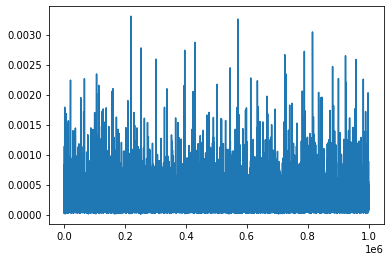

In [69]:
plt.plot(range(len(rt_seq)),rt_seq)


In [71]:

print(sum(rt_seq))
print(sum(rt_sim))
print(sum(rt_diag_sim))
print(sum(rt_dp_sim))
print(sum(rt_kb))
print(sum(rt_diag_kb))
print(sum(rt_dp_kb))
print(sum(rt_dame_leve))
print(sum(rt_jw))

165.87175614908082
218.1199897900161
236.07954732810256
292.1482978150174
524.4441610419083
542.476661218961
604.4303245150195
5.908505513147716
21.024431412107127


In [72]:
print(len(rt_seq))
print(len(rt_sim))
print(len(rt_diag_sim))
print(len(rt_dp_sim))
print(len(rt_kb))
print(len(rt_diag_kb))
print(len(rt_dp_kb))
print(len(rt_dame_leve))
print(len(rt_jw))

1000003
1000003
1000002
1000001
1000001
1000001
1000001
1000001
1000000


In [74]:
import pickle

In [95]:

f = open("ip_list.pkl", "wb")
pickle.dump(input_list, f)
f.close()



In [80]:
f=open("pat_list.pkl","wb")
pickle.dump(pattern_list,f)
f.close()


In [90]:
with open('ip_list.pkl', 'rb') as f:
  ip_list_l = pickle.load(f)
with open('pat_list.pkl','rb') as f:
  pat_list_l=pickle.load(f)

In [91]:
import collections

In [92]:
if collections.Counter(ip_list_l) == collections.Counter(input_list):
    print ("The lists are identical")
else :
    print ("The lists are not identical")
if collections.Counter(pat_list_l) == collections.Counter(pattern_list):
    print ("The lists are identical")
else :
    print ("The lists are not identical")

The lists are identical
The lists are identical


In [81]:
with open('runtime.npy', 'wb') as f:
    np.save(f, np.array(rt_seq))
    np.save(f, np.array(rt_sim))
    np.save(f,np.array(rt_diag_sim))
    np.save(f,np.array(rt_dp_sim))
    np.save(f,np.array(rt_kb))
    np.save(f,np.array(rt_diag_kb))
    np.save(f,np.array(rt_dp_kb))
    np.save(f,np.array(rt_dame_leve))
    np.save(f,rt_jw)
    


In [88]:
with open('runtime.npy', 'rb') as f:
    rt_seq_l = np.load(f)
    rt_sim_l = np.load(f)
    rt_diag_sim_l = np.load(f)
    rt_dp_sim_l = np.load(f)
    rt_kb_l = np.load(f)
    rt_diag_kb_l = np.load(f)
    rt_dp_kb_l= np.load(f)
    rt_dame_leve_l = np.load(f)
    rt_jw_l= np.load(f)

In [86]:
with open('distance.npy', 'wb') as f:
    np.save(f, np.array(d_seq))
    np.save(f, np.array(d_sim))
    np.save(f,np.array(d_diag_sim))
    np.save(f,np.array(d_dp_sim))
    np.save(f,np.array(d_kb))
    np.save(f,np.array(d_diag_kb))
    np.save(f,np.array(d_dp_kb))
    np.save(f,np.array(d_dame_leve))
    np.save(f,d_jw)
    

In [89]:
with open('distance.npy', 'rb') as f:
    d_seq_l = np.load(f)
    d_sim_l = np.load(f)
    d_diag_sim_l = np.load(f)
    d_dp_sim_l = np.load(f)
    d_kb_l = np.load(f)
    d_diag_kb_l = np.load(f)
    d_dp_kb_l= np.load(f)
    d_dame_leve_l = np.load(f)
    d_jw_l= np.load(f)

In [93]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
